In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

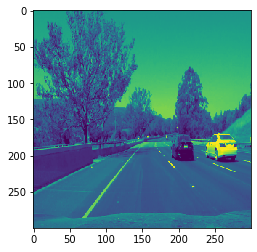

In [92]:
image = cv2.imread("Image_Database/road.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image = image = cv2.resize(image, (300,300))

plt.imshow(image)

In [93]:
kernel_y = np.array([[-1,-2, -1],
                   [ 0, 0, 0],
                   [ 1, 2, 1]])

kernel_x = np.array([[-1,0,1],
                     [-2,0,2],
                     [-1,0,1]])

def convolution(sub_image, kernel):
    kernel_dimension = len(kernel)
    pixel_sum=0
    
    for i in range(kernel_dimension):
        for j in range(kernel_dimension):
            pixel_kernel_value = sub_image[i,j]*kernel[i,j]
            #print(pixel_kernel_value)
            pixel_sum = pixel_sum+pixel_kernel_value
    
    if pixel_sum<0:
        return 0
    else:
        return pixel_sum%255

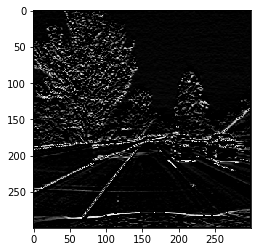

In [103]:
filtered_image = np.zeros(image.shape)

for row in range(1, len(image)-1):
    for col in range(1, len(image[row])-1):

        pixels = image[row-1:row+2, col-1:col+2]
        filtered_image[row, col] = convolution(pixels, kernel)

plt.imshow(filtered_image, cmap="gray")

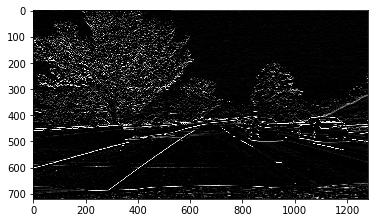

In [104]:
image = cv2.imread("Image_Database/road.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# image = image = cv2.resize(image, (1000, 1000))

sobel_y = np.array([[-1,-2,-1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])
filtered_image1 = cv2.filter2D(image, -1, sobel_y)

plt.imshow(filtered_image1, cmap="gray")

In [107]:
from Filter import filter

img = filter(image, kernel_x)

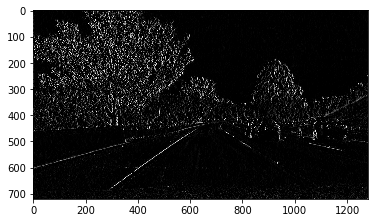

In [109]:
plt.imshow(img, cmap="gray")